In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [114]:
%config Completer.use_jedi = False

In [115]:
tickers=['fpt.csv','mwg.csv','vcb.csv']
port=pd.DataFrame()
for t in tickers:
    port[t]=pd.read_csv(t, index_col='<DTYYYYMMDD>')['<Close>']

In [116]:
port

,fpt.csv,mwg.csv,vcb.csv
<DTYYYYMMDD>,,,
20211105,97.6000,132.0,97.5
20211104,96.0000,129.9,98.4
20211103,96.1000,128.8,98.7
20211102,96.1000,128.9,97.9
20211101,95.8000,130.0,97.0
...,...,...,...
20061219,23.3650,NaN,NaN
20061218,22.2592,NaN,NaN
20061215,21.2016,NaN,NaN


In [117]:
port.reset_index('<DTYYYYMMDD>', inplace=True)

In [118]:
port.columns=['Date','FPT','MWG','VCB']

In [119]:
port['Date']=port['Date'].astype(str)


In [120]:
port.sort_values('Date',ascending=True,inplace=True)

In [121]:
port['Date']=pd.to_datetime(port['Date'])
port

,Date,FPT,MWG,VCB
3710,2006-12-13,19.2305,NaN,NaN
3709,2006-12-14,20.1920,NaN,NaN
3708,2006-12-15,21.2016,NaN,NaN
3707,2006-12-18,22.2592,NaN,NaN
3706,2006-12-19,23.3650,NaN,NaN
...,...,...,...,...
4,2021-11-01,95.8000,130.0,97.0
3,2021-11-02,96.1000,128.9,97.9
2,2021-11-03,96.1000,128.8,98.7
1,2021-11-04,96.0000,129.9,98.4


In [122]:
port=port.dropna()

In [123]:
port.set_index('Date', inplace=True)

In [124]:
port

,FPT,MWG,VCB
Date,,,
2014-07-14,14.4565,8.8945,17.3482
2014-07-15,14.6321,9.4948,17.4157
2014-07-16,14.6029,10.1496,17.6182
2014-07-17,14.4565,10.8590,17.4832
2014-07-18,15.3637,11.5683,17.6857
...,...,...,...
2021-11-01,95.8000,130.0000,97.0000
2021-11-02,96.1000,128.9000,97.9000
2021-11-03,96.1000,128.8000,98.7000


In [125]:
log_ret=np.log(port/port.shift(1))
log_ret

,FPT,MWG,VCB
Date,,,
2014-07-14,NaN,NaN,NaN
2014-07-15,0.012074,0.065311,0.003883
2014-07-16,-0.001998,0.066690,0.011560
2014-07-17,-0.010076,0.067560,-0.007692
2014-07-18,0.060863,0.063274,0.011516
...,...,...,...
2021-11-01,-0.011417,-0.010712,-0.010257
2021-11-02,0.003127,-0.008498,0.009236
2021-11-03,0.000000,-0.000776,0.008138


In [126]:
####anualized log_return
log_ret.mean()*252

FPT    0.263123
MWG    0.371644
VCB    0.237859
dtype: float64

In [127]:
# anualized cov
log_ret.cov()*252

,FPT,MWG,VCB
FPT,0.060206,0.034602,0.031625
MWG,0.034602,0.114637,0.032533
VCB,0.031625,0.032533,0.090713


In [128]:
#correlation
log_ret.corr()

,FPT,MWG,VCB
FPT,1.000000,0.416503,0.427937
MWG,0.416503,1.000000,0.319030
VCB,0.427937,0.319030,1.000000


In [129]:
portfolio_weights=[]
portfolio_return=[]
portfolio_risk=[]
sharpe_ratios=[]

In [130]:
tickers=['FPT','MWG','VCB']

In [131]:
for i in range (500):
    weights=np.random.random(len(tickers))
    weights=np.round((weights/np.sum(weights)),3)
    portfolio_weights.append(weights)
    annualized_return=np.sum(weights*log_ret.mean())*252
    portfolio_return.append(annualized_return)
    matrix_coveriance=log_ret.cov()*252
    portfolio_variance=np.dot(weights.T,np.dot(matrix_coveriance,weights))
    portfolio_standare_deviation=np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standare_deviation)                                      
    sharpe_ratio=annualized_return/portfolio_standare_deviation
    sharpe_ratios.append(sharpe_ratio)   
    

In [132]:
portfolio_returns=np.array(portfolio_return)
portfolio_risks=np.array(portfolio_risk)
sharpe_ratios=np.array(sharpe_ratios)

In [133]:
portfolio_metrics=[portfolio_return,portfolio_risk,sharpe_ratios,portfolio_weights]

In [134]:
portfolio_df=pd.DataFrame(portfolio_metrics).T

In [135]:
portfolio_df.columns=['Return','Risk','Sharpe_ratios','Weights']

In [136]:
portfolio_df

,Return,Risk,Sharpe_ratios,Weights
0,0.252931,0.252767,1.000649,"[0.21, 0.073, 0.717]"
1,0.295541,0.225458,1.310849,"[0.488, 0.339, 0.173]"
2,0.291335,0.225328,1.292939,"[0.368, 0.332, 0.299]"
3,0.281492,0.252162,1.116313,"[0.059, 0.315, 0.626]"
4,0.290188,0.250656,1.157712,"[0.059, 0.38, 0.561]"
...,...,...,...,...
495,0.290393,0.227602,1.275879,"[0.316, 0.333, 0.351]"
496,0.270585,0.228858,1.18233,"[0.321, 0.184, 0.495]"
497,0.318365,0.254923,1.248867,"[0.147, 0.574, 0.279]"
498,0.296453,0.230229,1.287648,"[0.307, 0.38, 0.313]"


In [137]:
min_risk=portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]

In [138]:
max_return=portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]

In [139]:
highest_sharpe=portfolio_df.iloc[portfolio_df['Sharpe_ratios'].astype(float).idxmax()]

In [140]:
min_risk

Return                       0.275479
Risk                         0.219114
Sharpe_ratios                1.257243
Weights          [0.52, 0.183, 0.297]
Name: 348, dtype: object

In [141]:
max_return

Return                      0.350491
Risk                        0.298484
Sharpe_ratios               1.174235
Weights          [0.1, 0.823, 0.077]
Name: 128, dtype: object

In [142]:
highest_sharpe

Return                       0.300468
Risk                         0.228867
Sharpe_ratios                1.312851
Weights          [0.45, 0.383, 0.167]
Name: 279, dtype: object

#### Visualization

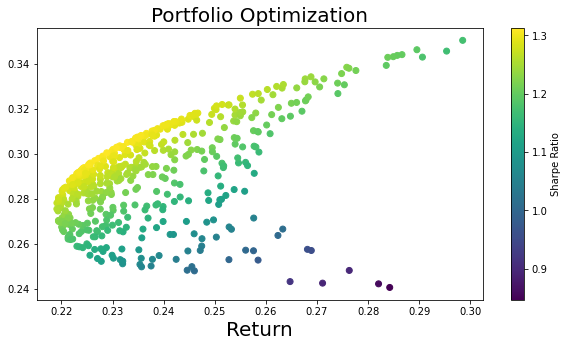

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(portfolio_risks,portfolio_returns, c=portfolio_returns/portfolio_risks)
plt.title('Portfolio Optimization', fontsize=20)
plt.xlabel('Volatility',fontsize=20)
plt.xlabel('Return',fontsize=20)
plt.colorbar(label='Sharpe Ratio')